# Linear Regression with Spark MLlib

In [ ]:
import os
import sys
# Here you need to have same Python version on your local machine and on worker node i.e. EC2. here both should have python3.
os.environ["PYSPARK_PYTHON"] = "/bin/python3"
os.environ["JAVA_HOME"] = "/usr/java/jdk1.8.0_161/jre"
os.environ["SPARK_HOME"] = "/home/ec2-user/spark-2.4.4-bin-hadoop2.7"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] + "/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] + "/pyspark.zip")

In [ ]:
# Run this cell if you are using sklearn for the first time
# ! pip3 install sklearn --userb

In [ ]:
# Creating Spark Session 
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('LR_SparkML').getOrCreate()

In [ ]:
from sklearn import datasets
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
boston = datasets.load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target
df.head()

In [ ]:
sdf = spark.createDataFrame(df)
sdf.show(truncate=False)

In [ ]:
assembler = VectorAssembler(inputCols=[c for c in sdf.columns if c != 'price'],
                            outputCol='features')
dataset = assembler.transform(sdf)
sdf.show(truncate=False)

In [ ]:
dataset.select("features").show(truncate=False)

In [ ]:
dataset.cache() # <---

In [ ]:
lr = LinearRegression(featuresCol='features', labelCol='price')
model = lr.fit(dataset)

## Importance of Individual Features

In [ ]:
model.coefficients

In [ ]:
assembler.getInputCols()

In [ ]:
pd.Series(np.array(model.coefficients), index=assembler.getInputCols()).plot(kind='bar')

# Getting Metrics

In [ ]:
summary = model.evaluate(dataset)
summary.r2

In [ ]:
summary.explainedVariance

## Training on a subset of the data

In [ ]:
subset = sdf.select("CHAS", "NOX", "RM", "price")
assembler = VectorAssembler(inputCols=[c for c in subset.columns if c != 'price'],
                            outputCol='features')
small_dataset = assembler.transform(subset)
small_dataset.show()

In [ ]:
lr = LinearRegression(featuresCol='features', labelCol='price')
small_model = lr.fit(small_dataset)
summary = small_model.evaluate(small_dataset)

In [ ]:
summary.r2

In [ ]:
summary.explainedVariance

## Exercise: Fit a Linear Regression on the Diabetes Dataset
### Step 1: Create a spark DataFrame, and prepare the dataset
### Step 2: Find the R2 score and explained variance
### Step 3: Find a subset of features with the highest absolute coefficients (by plotting)
### Step 4: Train a new model on this subset, and find R2 and explained variance

In [ ]:
# Step 1
diabetes = datasets.load_diabetes()
# complete code below
df = None
assembler = None
dataset = None

In [ ]:
# Step 2 - complete code below
lr = None
model = None
summary = None
print(summary.r2, summary.explainedVariance)

In [ ]:
# Step 3:
# enter code here

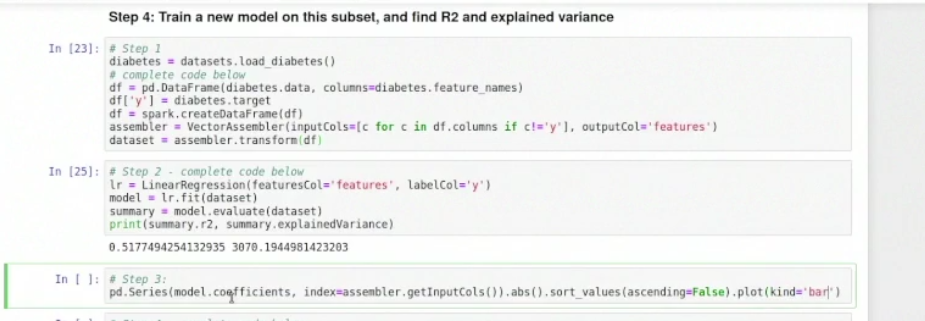

In [ ]:
# Step 4 - complete code below
subset = None
assembler = None
small_dataset = None

lr = None
model = None
summary = None
print(summary.r2, summary.explainedVariance)

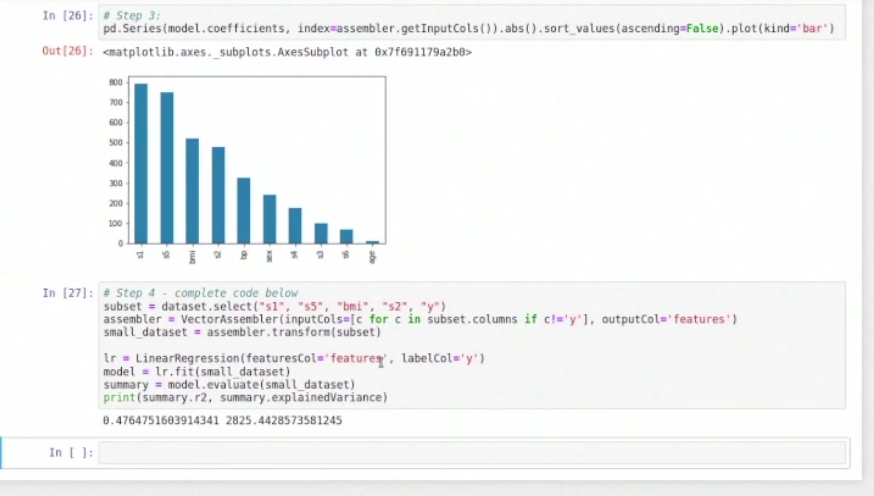